# Netflix

## Importamos librerias

- files de google colab para subir archivos locales al notebook
- pandas para leer el archivo .csv y manipularlo
- matplotlib para graficar cuando lo pide la consigna
- numpy para el manejo de arrays
- seaborn para graficar el heatmap en el punto D
- datetime para operaciones con horarios reales
- Counter de collections para facilitar la creacion de un diccionario en el punto B

In [ ]:
from google.colab import files
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime

uploaded = files.upload() # uploaded es un diccionario cuyas 'keys' son los nombres de los archivos subidos, y los 'values', los archivos en si
info = list(uploaded.keys())[0] # info es el primer valor de las 'keys' de uploaded, hechas una lista
df = pd.read_csv(info) # leemos el archivo csv subido, llamandolo por su nombre, y lo guardamos en 'df', un dataframe de pandas
df

Saving NetflixHistory.csv to NetflixHistory (1).csv


,Unnamed: 0,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,0,Chona,2022-08-21 19:54:53,00:02:54,NaN,Community: Temporada 3: Teoría del caos correc...,NaN,Apple Apple TV 4 Apple TV,00:02:55,00:02:55,AR (Argentina)
1,1,Chona,2022-08-21 19:33:17,00:21:33,NaN,Community: Temporada 3: Ecología competitiva (...,NaN,Apple Apple TV 4 Apple TV,00:21:33,00:21:33,AR (Argentina)
2,2,Chona,2022-08-21 19:11:40,00:21:28,NaN,Community: Temporada 3: Geografía del conflict...,NaN,Apple Apple TV 4 Apple TV,00:21:28,00:21:28,AR (Argentina)
3,3,Chona,2022-08-21 18:50:27,00:20:41,NaN,Community: Temporada 2: Intermediate Documenta...,NaN,Apple Apple TV 4 Apple TV,00:21:02,00:21:02,AR (Argentina)
4,4,Chona,2022-08-21 18:16:34,00:21:20,NaN,Community: Temporada 3: El documental (Capítul...,NaN,Apple Apple TV 4 Apple TV,00:21:21,00:21:21,AR (Argentina)
...,...,...,...,...,...,...,...,...,...,...,...
12992,12992,Chona,2015-01-08 19:21:21,00:04:09,NaN,Lost: Temporada 1: Éxodo: Parte 1 (Capítulo 23),NaN,Apple TV 3 (revised),00:04:40,Not latest view,AR (Argentina)
12993,12993,Chona,2015-01-08 19:20:47,00:00:15,NaN,Lost: Temporada 1: Nacida para correr (Capítul...,NaN,Apple TV 3 (revised),00:00:14,Not latest view,AR (Argentina)
12994,12994,Chona,2015-01-08 19:18:32,00:00:37,NaN,Lost: Temporada 1: Éxodo: Parte 1 (Capítulo 23),NaN,Apple TV 3 (revised),00:00:37,Not latest view,AR (Argentina)
12995,12995,Chona,2015-01-08 19:16:45,00:00:18,NaN,Lost: Temporada 1: Éxodo: Parte 1 (Capítulo 23),NaN,Apple TV 3 (revised),00:00:18,Not latest view,AR (Argentina)


## Creamos el filtro pedido por la consigna

In [3]:
df = df.loc[(df['Device Type'] != 'Sony PS4') &
              (df['Device Type'] != 'Netflix Windows App - Cadmium Windows Mobile') &
              (df['Device Type'] != 'Apple iPhone 6s') &
              (df['Device Type'] != 'Apple iPhone 7 Plus (CDMA)') &
              (df['Device Type'] != 'Chrome PC (Cadmium)') &
              (df['Device Type'] != 'Samsung 2015 NT14M DTV Smart TV') &
              (df['Device Type'] != 'iPhone 5S GSM') &
              (df['Device Type'] != 'Google Chromecast V3 Streaming Stick')]

# Utilizo el metodo '.loc' de pandas  en el dataframe 'df' para localizar todas las filas que cumplan
# la condicion de que la columna 'Device Type' no iguale ninguno de los valores especificados, el metodo
# devuelve un nuevo dataframe de pandas al cual igualo al original.

## Punto A:
Contabilizar el dispositivo con el que más títulos se reprodujeron.

#### Explicación:
Este ejercicio lo pensé por partes. Hice una función por cada parte de mi razonamiento. Comencé por lo básico, ya que para contabilizar los dispositivos debía obtenerlos, y eso realiza la funcion todosLosDispositivos, explicada en el código. Luego, quería comparar las ocurrencias totales de los dispositivos con cada dispositivo, y para no hacerlo manualmente, hice una función llamada cadaDispositivo que almacena una única vez todos los dispositivos. Luego, hice la función OcurrenciasDeDispositivos, que cuenta las ocurrencias de cada dispositivo a lo largo del historial basado en las listas generadas por las funciones anteriores. Por último, tenía que hacer una función que haga lo mismo que la anterior, pero que almacene el dispositivo de mayor ocurrencias; a esta función la llamé mayorOcurrencia.
El ejercicio fue realizado con distintas funciones para que el código sea más organizado, legible y me facilite encontrar errores de lógica.

In [4]:
def todosLosDispositivos(): #Declaro la primera función. Objetivo: generar una lista con el nombre del dispositivo cada vez que aparece.
  new_df = df['Device Type'].values.tolist() #Creo una nueva lista que contiene todos los tipos de dispositivo.
  return new_df #Retorno la lista con todos los dispositivos de cada fila.

def cadaDispositivo(): #Declaro la primera función. Objetivo: generar una lista con el nombre del dispositivo cada vez que aparece.
  new_df = df['Device Type'].values.tolist() #Creo una nueva lista que contiene todos los tipos de dispositivo.
  listaDispositivos = [] #Creo mi lista de dispositivos únicos.
  for n in new_df:  #Recorro todos los dispositivos.
    if n not in listaDispositivos: #Pregunto si el dispositivo actual no se encuentra en mi lista.
      listaDispositivos.append(n) #Si no se encuentra lo agrego.
  return listaDispositivos #Devuelvo la lista.

listaTotal = todosLosDispositivos() #Declaro y asigno una variable a la lisa que me devuelve esta función.
lista = cadaDispositivo() #Declaro y asigno una variable a la lisa que me devuelve esta función.

def ocurrenciasDeDispositivos(): #Declaro mi tercera función. Objetivo: saber las ocurrencias de cada dispositivo.
  for n in lista: #Recorro la lista de cada dispositivo.
    ocurr = listaTotal.count(n) #Asigno la cantidad de veces que ese dispositivo aparece en la lista total.
    print(n, ' ocurre ', ocurr, ' veces') #Printeo el resultado.

def mayorOcurrencia(): #Declaro mi cuarta y última función. Objetivo: saber el dispositivo de mayor ocurrencias.
  maxOcurr = 0 #Declaro mi variable que almacene el mayor número de ocurrencias.
  nombre = '' #Declaro mi variable que almacene el nombre del dispositivo con el mayor número de ocurrencias.
  for n in lista: #Recorro la lista de cada dispositivo.
    ocurr = listaTotal.count(n) #Asigno la cantidad de veces que ese dispositivo aparece en la lista total.
    if ocurr > maxOcurr: #Pregunto si la cantidad del dispositivo actual es mayor a la cantidad máxima almacenada.
      maxOcurr = ocurr #En caso de cumplirse, tenemos un nuevo número máximo de ocurrencias, lo asignamos a nuestra variable.
      nombre = n #También almacenamos el nombre de dicho dispositivo, para diferenciarlo y no tener que buscar manualmente cuál es.
  print(nombre, 'es el que aparece más veces, siendo', maxOcurr, 'su cantidad de ocurrencias') #Printeamos el resultado.
mayorOcurrencia()

Apple Apple TV 4 Apple TV es el que aparece más veces, siendo 3519 su cantidad de ocurrencias


## Punto B:
Encontrar la película con más ocurrencias y la película con mayor duración total.

#### Explicación:
Este ejercicio lo pensé por partes. Primero explico la primera parte y luego la segunda.
Encontrar la película con más ocurrencias fue parecido al ejercicio anterior, pero requería clasificar en distintas categorías y quedarse con una. La diferenciación entre pelis y series la dijo el profesor en clase, la cantidad de ':'. Luego, para diferenciar las pelis del resto, noté que siempre estaba presente la palabra en el título, por lo que si ninguna de esas palabras se encuentra en mi título, quiere decir que es una peli. Una vez que tenía mis películas, hice el mismo procedimiento que en el ejercicio anterior, pero de manera más práctica y sencilla.
Luego, la segunda parte de la consigna. Esto requería tener las pelis, pero ya no me servía mi lista, porque no sabía las duraciones de cada peli; necesitaba un Df para acceder a la peli y su duración. Esto lo conseguí haciendo una filtración similar a la anterior, pero para que me devolviese un Df en lugar de una lista. Con este Df, hago dos listas que contengan los nombres y las duraciones de las pelis. Como las duraciones eran strings y tenían el ':', se los saqué y los pasé a ints. Por último, el proceso de determinar la mayor duración fue similar a como fue realizado anteriormente con otras cosas. Sin embargo, esta vez utilicé un diccionario, ya que quería tener el nombre y la duración cada vez que lo recorra (2 valores en 1 espacio) Recorriendo ambas listas (la de duraciones y la de títulos), construí el diccionario. Cuando conseguí la mayor duración, simplemente obtuve el value asignado a esa key, es decir, el nombre de la película cuya duración fuese exactamente esa.

In [5]:
titulos = df['Title'].values.tolist() #Creo mi variable titulos que almacena todos los titulos de la lista.
def esPelicula(): #Declaro la primera función. Objetivo: devolver una lista con las películas.
  peliculas = [] #Declaro mi lista.
  for n in titulos: #Recorro la lista que contiene todos los titulos.
    if n.count(':') <= 1 and 'Clip' not in n and 'hook' not in n and 'Tráiler' not in n and 'Avance' not in n and 'Resumen' not in n:
#Cuento la cantidad de ':' que hay. En caso de ser 1 o 0, no es una serie. Luego pregunto si no es ningún otro tipo de titulo.
      peliculas.append(n) #Habiendo descartado el resto, es una película.
  return peliculas #Se devuelve la lista.
peliculas = esPelicula()

ocurrPelis = dict(Counter(peliculas))
#Creo mi variable ocurrPelis, que es un diccionario cuya key es el título y el value la cantidad de ocurrencias.

mostFreq = 0 #Creo mi variable mostFreq, que almacena la mayor ocurrencia.
nameMovie = None #Creo la variable nameMovie, que almacena el nombre de la película almacenada en mostFreq.
for key, value in ocurrPelis.items(): #Recorro el diccionario, rescatando tanto las keys como los values.
  if value > mostFreq: #Pregunto si el value (cantidad de ocurrencias) es mayor a mi variable.
      mostFreq = value #En ese caso hay una nueva peli que aparece más veces.
      nameMovie = key #Se almacena tanto las ocurrencias como el nombre en las variables correspondientes.
print('La película con más ocurrencias es', nameMovie, 'con', mostFreq, 'ocurrencias.') #Se printea el resultado.

def clasificador(titulo, supVidType): #Declaro la función clasificador. Objetivo: clasificar los títulos. Requiere dos argumentos: el título, y su Supplemental Video Type
  if pd.isnull(supVidType): #Pregunto si el Supplemental Video Type (SVT) es nulo.
    if titulo.count(':') <= 1: #Si el SVT nulo, quiere decir que es una serie o una película. La diferencia entre estas dos es la cantidad de ':' que tienen.
      return 'pelicula' #En caso de que la cantidad de ':' sea 1 o ninguna, es una película.
    else:
      return 'serie' #En cualquier otro caso, es una serie.
  else: #Si SVT no es nulo, quiere decir que se encuentra en otra categoría, ya sea 'hook', 'tráiler' o 'resumen', entre otros.
    return 'distinto'

df['Category'] = df.apply(lambda n: clasificador(n['Title'], n['Supplemental Video Type']), axis = 1)
#Creo una columna llamada categoría, y le aplico el calificador con las columnas título y SVT.
new_df = df.drop(df[(df['Category'] == 'distinto') | (df['Category'] == 'serie')].index)
#Creo un nuevo dataframe a partir del anterior, pero le saco las filas que entran en la categoría 'distinto' y 'serie', para quedarme solo con las pelis.

peliculas = list(new_df['Title']) #Hago una lista llamada películas que contiene los títulos de las pelis de mi nuevo Df.

duration = list(new_df['Duration']) #Hago una lista que contiene las duraciones de las pelis de mi nuevo Df.
duracionesSinPuntos = [] #Declaro una lista que contenga los valores numéricos de las duraciones.
for n in duration: #Recorro las duraciones.
  duracionesSinPuntos.append(int(n.replace(':', ''))) #Agrego a mi lista el int sin el caracter ':'.

#No necesito pasarlo a segundos, ya que puedo comparar por su valor. Más largo significa que dure horas, y mientras mayor sea el primer caracter, mayor es la cantidad de horas/minutos.

diccionario = {} #Declaro un diccionario.

for k, v in zip(duracionesSinPuntos, peliculas): #Recorro tanto la lista de las duraciones como la de los nombres de las pelis.
	diccionario[k] = v #Asigno al diccionario la duración como la key y el nombre como value. Explicado porqué debajo.
#Eso fue pensado para poder obtener la mayor key (duración) y cuando quiera saber el nombre de esa peli simplemente llamo al value correspondiente en esa key, y no viceversa.


mayorDuracion = 0 #Declaro una variable que contenga la mayor duración.
for n in duracionesSinPuntos: #Recorro la lista de las duraciones.
  if n > mayorDuracion: #Saco la mayor, procedimiento explicado arriba.
    mayorDuracion = n
print('La película de mayor duración es', diccionario[mayorDuracion])
#Printeo el resultado, llamando al diccionario y la key más alta para acceder al value, lo que más nos interesa.

La película con más ocurrencias es Star Wars: El Imperio contraataca con 7 ocurrencias.
La película de mayor duración es El club de la pelea


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## Punto C:

In [6]:
def checkForSeries(serie):  # Distinguir series
  serie = serie.split(":")
  return len(serie) >= 2

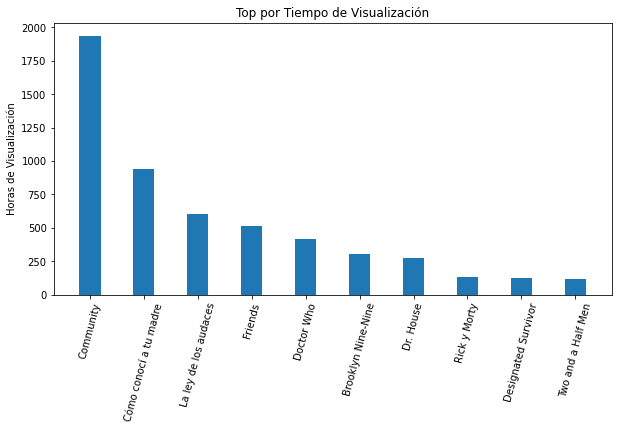

In [7]:
def topByViews(DF,n): 
  Series = {} # Diccionario --> keys = titulo, value = tiempo
  SeriesLst = [] # Lista de titulos
  for serie in list(DF.Title):
    if(checkForSeries(serie)):
      if serie.split(":")[0] in Series: # Si el titulo esta en el diccionario...
        time = list(DF[DF.Title == serie].Duration) # Lista de duracion de cada reprodución (por ocurrencia)
        for t in time:
          t = t.split(":")
          T = int(t[0])*3600 + int(t[1])*60 + int(t[2]) # Pasar tiempo a segundos
          Series[serie.split(":")[0]] += T # Settear el tiempo
      else:
        if len(serie.split(":")[0].split("(")) == 1 and serie.split(":")[0] != "Resumen" and serie.split(":")[0] != "Tráiler": # Si el titulo es de una serie...
          Series[serie.split(":")[0]] = 0 # Agregar titulo al diccionario con 0 como value
          SeriesLst.append(serie.split(":")[0]) # Agregar titulo a la lista de titulos
  SeriesLstViews = [] # Lista de tiempos
  for i in range(len(SeriesLst)): 
    if Series[SeriesLst[i]] != 0: # Si hay tiempo de reproduccion...
      SeriesLstViews.append(Series[SeriesLst[i]]) # Agregar tiempo a la lista
  top = [] # Lista del top n
  topVal = [] # Lista con valores de los top n
  for i in range(n):
    temp = max(SeriesLstViews)
    topVal.append(round(temp/3600,2)) # agregar horas de visualización con dos decimales de precisión 
    for key, value in Series.items():   #
         if temp == value:              # Encontrar y agregar el titulo a partir del tiempo de reproduccion
             top.append(key)            #
    SeriesLstViews.remove(temp)         #
  
  plt.figure(figsize = (10, 5))                 #
  plt.bar(top,topVal,width = .4)                #
  plt.xticks(rotation=75)                       # Crear y mostrar el gráfico 
  plt.ylabel("Horas de Visualización")          # con los resultados
  plt.title("Top por Tiempo de Visualización")  #
  plt.show()                                    #

topByViews(df,10)

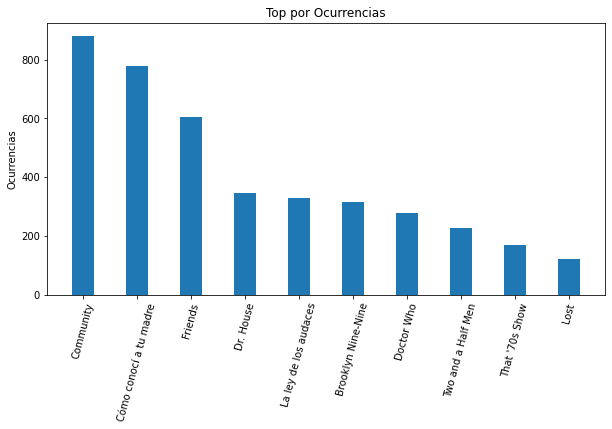

In [8]:
def topByOcurr(DF,n):
  Series = {} # Diccionario --> keys = titulo, value = ocurrencias
  SeriesLst = [] # Lista de titulos
  for serie in list(DF.Title):
    if(checkForSeries(serie)):
      if serie.split(":")[0] in Series: # Si el titulo esta en el diccionario...
        Series[serie.split(":")[0]] += 1 # Agregar 1 a las ocurrencias
      else:
        if len(serie.split(":")[0].split("(")) == 1 and serie.split(":")[0] != "Resumen" and serie.split(":")[0] != "Tráiler": # Si el titulo es de una serie...
          Series[serie.split(":")[0]] = 0 # Agregar el titulo al diccionario
          SeriesLst.append(serie.split(":")[0]) # Agregar titulo a la lista de titulos
  SeriesLstOcurr = [] # Lista de ocurrencias
  for i in range(len(SeriesLst)): 
    if Series[SeriesLst[i]] != 0: # Si hay ocurrencias...
      SeriesLstOcurr.append(Series[SeriesLst[i]]) # Agregar ocurrencias a la lista
  top = [] # Lista del top n
  topVal = [] # Lista con valores de los top n
  for i in range(n):
    temp = max(SeriesLstOcurr)
    topVal.append(temp)
    for key, value in Series.items():   #
         if temp == value:              # Encontrar y agregar el titulo a partir de las ocurrencias
             top.append(key)            #
    SeriesLstOcurr.remove(temp)         #
  
  plt.figure(figsize = (10, 5))         #
  plt.bar(top,topVal,width = .4)        #
  plt.xticks(rotation=75)               # Crear y mostrar el gráfico 
  plt.ylabel("Ocurrencias")             # con los resultados
  plt.title("Top por Ocurrencias")      #
  plt.show()     


topByOcurr(df,10)

## Ejercicio D:

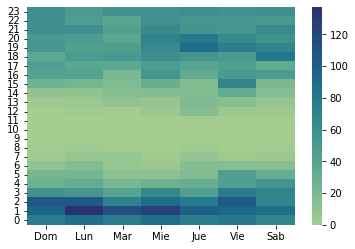

In [9]:
lstForArray =  [ [0] * 7 for x in range(24)] # lista de listas de 7*24 para representar el heatmap 
def graphViews(DF):
  for watched in DF["Start Time"]: # para cada fecha y horario en el que se empezó a ver una serie/película...
    watchedDate = datetime.datetime.strptime(''.join(list(watched)), '%Y-%m-%d %H:%M:%S') # transformar horario de string a datetime.datetime
    lstForArray[23-int(watchedDate.hour)][int(watchedDate.weekday())] += 1 # agregar 1 a la casilla de la lista de listas que representa hora y dia de la semana
  arr = np.array(lstForArray) # lista de listas a array
  X = ["Dom","Lun","Mar","Mie","Jue","Vie","Sab"] # labels x
  Y = [23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1,0] # labels y
  htmp = sns.heatmap(arr,xticklabels=X,yticklabels=Y,cmap="crest") # heatmap con los datos del array
  plt.show() # mostrar el heatmap
graphViews(df)

## Ejercicio E
### Contabilizar la cantidad de títulos vistos por año, graficar su variación a través de los años.

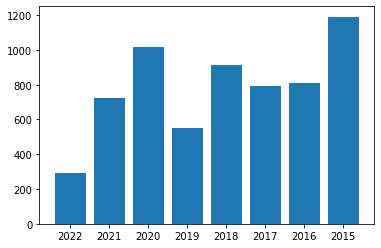

In [10]:
def titulosPorAnio(DF):
  anios = [] # creo una lista donde voy a guardar todos los anios encontrados en el dataframe.
  cantTitulos = [] # creo una lista donde se van a guardar la cantidad de titulos vistos en cada anio.


  # el siguiente bucle for nos deja con todos los anios en los que se reprodujeron titulos guardados en la lista 'anios'

  for anio in (DF['Start Time'].str)[0:4]:
  # ciclo entre los primeros 4 caracteres de la columna 'Start Time' de cada fila, esto hace que 'anio'
  # sea igual al anio en el que se reprodujo el titulo correspondiente a esa fila .
    
    if anio not in anios: # si encontramos un anio que no este aun en la lista anios...
      anios.append(anio) # ... entonces lo agregamos al final de la lista.

  # el siguiente bucle for nos deja con la cantidad de titulos reproducidos en cada anio guardados en la lista 'cantTitulos'

  for anio in anios:
  # ciclamos entre los valores que toma 'anios' luego de que se evalue el bucle anterior para todo el dataframe,
  # en otras palabras, todos los anios en los que se reprodujeron titulos.
    
    titulosAnio = DF.loc[((DF['Start Time'].str)[0:4]) == anio]
    # creamos una serie de pandas con las filas cuyo anio sea igual al valor actual actual de 'anio' 
    
    cantTitulos.append(len(titulosAnio)) # agregamos al final de 'cantTitulos' la longitud de la serie que acabamos de crear   

  plt.bar(anios, cantTitulos) # graficamos una lista en funcion de la otra

titulosPorAnio(df)

## Ejercicio F:
### Total de días de todos los títulos reproducidos.

In [13]:
def diasVistos(DF):

  split = [] # creo una lista donde se va a guardar la duracion de cada fila dividida en horas, minutos, segundos

  for val in DF['Duration']: # ciclo entre los valores de la columna 'Duration' de cada fila
    split.append(val.split(':')) # agrego al final de 'split' una lista con los caracteres de 'val' divididos por cada ':' que aparece

  split = np.asarray(split).astype(int)
  # convierto la lista 'split' a un array de numpy para convertir sus valores a tipo int, para luego hacer operaciones matematicas con ellos 
      
  horas = [] # creo una lista donde voy a guardar todos las horas en 'split'
  minutos = [] # lo mismo para los minutos
  segundos = [] # y para los segundos
  for lista in split: # ciclo en cada lista en split
    horas.append(lista[0]) # le agrego al final de 'horas' el primer valor de 'lista' (este valor representa horas)
    minutos.append(lista[1]) # agrego el segundo a 'minutos' (este valor representa minutos)
    segundos.append(lista[2]) # y agrego el tercero a 'segundos' (este valor representa segundos)

  totalSegundos = 0 # esta variable va a guardar el total de segundos vistos en todo el historial 

  for val in segundos: # ciclo por los valores de 'segundos' y los sumo al total
    totalSegundos += val

  for val in minutos: # lo mismo para los minutos, multiplicandolos primero por 60 para convertirlos a segundos
    totalSegundos += val*60

  for val in horas: # lo mismo para las horas, pero multiplicandolas por 3600
    totalSegundos += val*3600

  totalMinutos = totalSegundos//60 # esta variable guarda el total de minutos alguna vez vistos
  totalHoras = totalSegundos//3600 # esta guarda el total de horas
  totalDias = totalHoras//24 # y finalmente, esta el total de dias

  # podria haber hecho una sola variable que es igual a los segundos divididos por 84,400, (60x60x24), pero asi me parecio mas prolijo
  
  print('El total de dias de reproduccion en el historial es:', totalDias)

diasVistos(df)

El total de dias de reproduccion en el historial es: 99


## Ejercicios Bonus: 1.
### Identificar cuál fue la película de Star Wars más veces vista por duración.

In [12]:
def swMasVista(DF):

  # creo pequenios dataframes con todas las filas cuyo titulo es una pelicula de star wars
  ep1 = DF.loc[DF['Title'] == 'Star Wars: La amenaza fantasma']
  ep2 = DF.loc[DF['Title'] == 'Star Wars: El ataque de los clones']
  ep3 = DF.loc[DF['Title'] == 'Star Wars: La venganza de los Sith']
  ep4 = DF.loc[DF['Title'] == 'Star Wars: Una nueva esperanza']
  ep5 = DF.loc[DF['Title'] == 'Star Wars: El Imperio contraataca']
  ep6 = DF.loc[DF['Title'] == 'Star Wars: El regreso del Jedi']

  durSW = []
  # lista que va a guardar la duraciond de cada episodio en segundos
  
  sw = [ep1, ep2, ep3, ep4, ep5, ep6] # lista que contiene los otros dataframes asi puedo ciclar por esta

  for ep in sw: # por cada dataframe en 'sw'...
    epDur = 0   # variable temporal, va a guardar la duracion de cada ocurrencia de un episodio de Star Wars a la vez
    for val in ep['Duration']: # por cada valor en la columna 'Duration' del dataframe actual en el bucle...
      valSplit = val.split(':') # creamos una lista con los caracteres de 'val', separados por cada ':'
      sumaOcurr = 0 # variable temporal, va a guardar la suma de los segundos de la ocurrencia actual del episodio actual de Star Wars
      sumaOcurr += int(valSplit[0])*3600
      # le sumamos el primer valor de 'valSplit', la cantidad de horas de reproduccion  de esta ocurrencia, multiplicado por 3600 para pasarlo a segundos
      sumaOcurr += int(valSplit[1])*60
      # lo mismo con los minutos, lo multiplicamos por 60 en este caso
      sumaOcurr += int(valSplit[2])
      # aca simplemente sumamos los segundos
      epDur += sumaOcurr # le sumumamos a 'epDur' la cantidad de segundos de esta ocurrencia del episodio actual de Star Wars  
    durSW.append(epDur)
    # una vez que 'epDur' tiene todas las duraciones de el episodio actual en el bucle for, agregamos el valor en segundos al final de la lista 'durSW'
    
  max = np.argmax(np.asarray(durSW)) # 'max' es el indice del elemento mayor en durSW 

  res = list(sw[max]['Title'])[0]
  # res es el primer elemento en la serie convertida a lista 'list(sw[max]['Title])', donde 'sw[max]' es el dataframe del episodio mas visto de Star Wars,
  # y al agregarle ' ['Title'] ' obtenemos la columa 'Title'. Eso devuelve una serie de pandas que convertimos a lista y tomamos el primer valor,
  # dejandonos con el string literal del nombre del episodio mas visto, para automatizar el siguiente 'print()'

  print('La pelicula de Star Wars mas vista por Chona es "'+ res + '"') # mostramos el resultado por consola
  
swMasVista(df)

La pelicula de Star Wars mas vista por Chona es "Star Wars: El Imperio contraataca"
